In [6]:
from functions import *
import numpy as np
from matplotlib import pyplot as plt

# Question 1

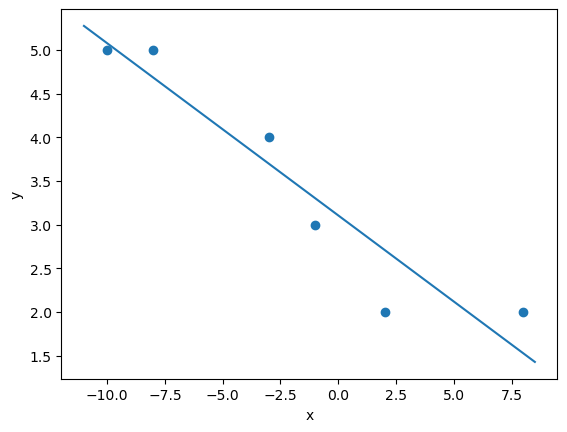

poly1d([-0.19724771,  3.10550459])

In [7]:
x = np.array([-10, -8, -3, -1, 2, 8])
y = np.array([5, 5, 4, 3, 2, 2])
coeffs = poly_reg(x, y, 1, plot=True)
coeffs

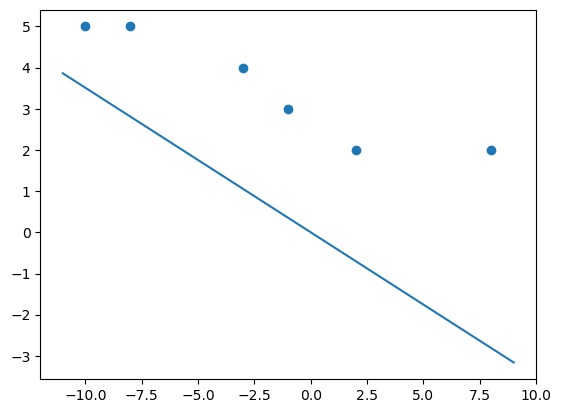

array([[-0.35123967]])

In [16]:
X = x.reshape((-1, 1))
Y = y.reshape((-1, 1))
w = np.linalg.inv(X.T @ X) @ X.T @ Y
points = np.linspace(-11, 9, 100).reshape((-1, 1))
res = points @ w
plt.plot(points, res)
plt.scatter(x, y)
plt.show()
w

Adding a bias term produces better linear regression
# Qn 2

### Without bias:

In [37]:
x = np.array([1, 0, 1, 2, -1, 1, 1, 1, 5]).reshape((3, 3))
y = np.array([1, 2, 3]).reshape((-1, 1))
w = np.linalg.lstsq(x, y, rcond=None)[0]
print(w)
a = np.array([-1, 2, 8]).reshape((1, 3)) @ w
b = np.array([1, 5, -1]).reshape((1, 3)) @ w
print(a)
print(b)

[[ 0.33333333]
 [-0.66666667]
 [ 0.66666667]]
[[3.66666667]]
[[-3.66666667]]


### With bias:

In [38]:
x_bias = np.hstack((x, np.ones((3, 1))))
w_bias = np.linalg.lstsq(x_bias, y, rcond=None)[0]
print(w_bias)
a = np.array([-1, 2, 8, 1]).reshape((1, 4)) @ w_bias
b = np.array([1, 5, -1, 1]).reshape((1, 4)) @ w_bias
print(a)
print(b)

[[ 0.52380952]
 [-0.47619048]
 [ 0.61904762]
 [-0.14285714]]
[[3.33333333]]
[[-2.61904762]]


# Qn 3

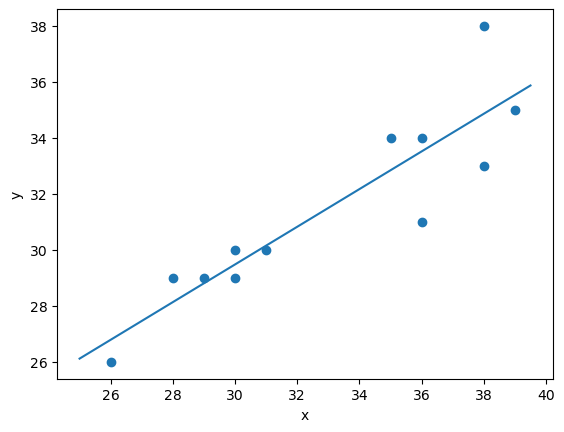

poly1d([0.67272727, 9.3       ])

In [40]:
students = np.array([36, 28, 35, 39, 30, 30, 31, 38, 36, 38, 29, 26]).reshape((-1, 1))
books = np.array([31, 29, 34, 35, 29, 30, 30, 38, 34, 33, 29, 26]).reshape((-1, 1))
model = poly_reg(students, books, 1, plot=True)
model

In [42]:
print(model)
print(model(30))
print(model(5))

 
0.6727 x + 9.3
29.48181818181817
12.663636363636364


# Qn 4

### Unpurged:

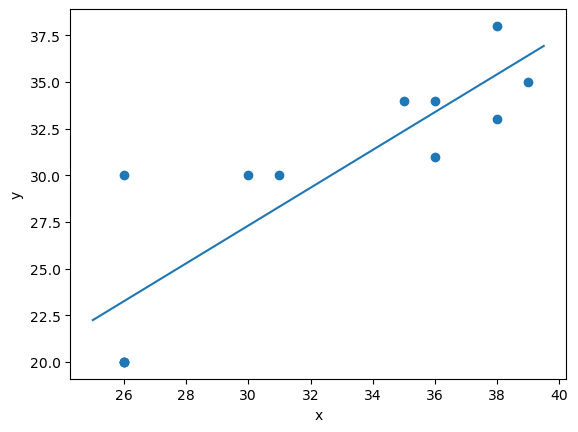

 
1.013 x - 3.082
27.30432446951384


In [48]:
data = np.array([36, 31, 26, 20, 35, 34, 39, 35, 26, 20, 30, 30, 31, 30, 38, 38, 36, 34, 38, 33, 26, 20, 26, 30]).reshape((-1, 2))
model = poly_reg(data[:, 0], data[:, 1], 1, plot=True)
print(model)
print(model(30))

### Purged

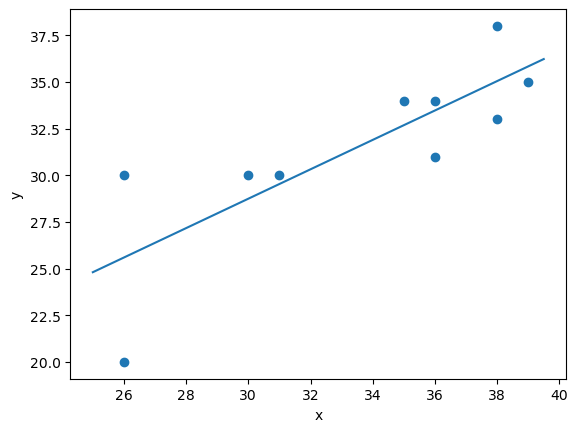

 
0.7875 x + 5.118
28.743648960739023


In [49]:
data_purge = np.unique(data, axis=0)
model = poly_reg(data_purge[:, 0], data_purge[:, 1], 1, plot=True)
print(model)
print(model(30))

The model with data purged seem to have a more accurate linear regression.

# Qn 5

In [53]:
import pandas as pd
df = pd.read_csv("../T2/government-expenditure-on-education.csv")
df

,year,total_expenditure_on_education
0,1981,942517
1,1982,1358430
2,1983,1611647
3,1984,1769728
4,1985,1812376
5,1986,1641893
6,1987,1654115
7,1988,1604473
8,1989,1765250
9,1990,2056374


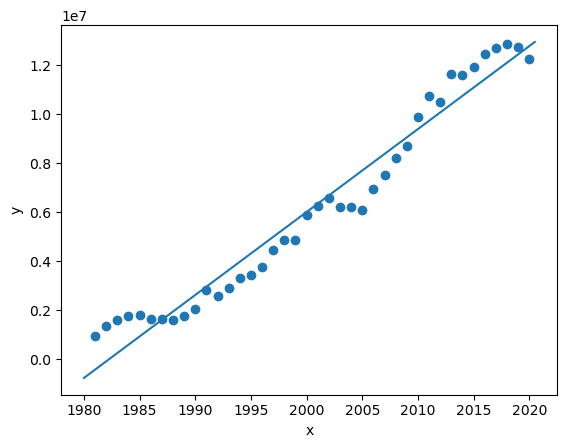

 
3.381e+05 x - 6.702e+08
-663124844.1329359


In [86]:
model = poly_reg(df.year.to_numpy(), df.total_expenditure_on_education.to_numpy(), 1, plot=True)
print(model)
print(model(21))

# Qn 6

In [59]:
wine_df = pd.read_csv("winequality-red.csv", sep=";")
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [75]:
y = wine_df.quality.to_numpy().reshape(-1, 1)
x = wine_df.drop("quality", axis=1).to_numpy()
x_train, x_target, y_train, y_target = x[:1500, :], x[1500:, :], y[:1500, :], y[1500:, :]

In [82]:
x_train_bias = np.hstack((x_train, np.ones((len(x_train), 1))))
w = np.linalg.lstsq(x_train_bias, y_train, rcond=None)[0]
y_train_result = np.hstack((x_target, np.ones((99, 1)))) @ w
MSE = np.mean((y_train_result - y_target) ** 2)
MSE

0.3435263811930315

# Qn 7
### True
# Qn 8
### b
# Qn 9

In [92]:
x = np.array([3, -1, 0, 5, 1, 2, 9, -1, 3, -6, 7, 2, 3, -2, 0]).reshape((-1, 3))
y = np.array([1, -1, -1, 0, 1, 2, 0, 3, 1, -2]).reshape((-1, 2))
x_bias = np.hstack((x, x[:, :1] ** 0))
w = np.linalg.lstsq(x_bias, y, rcond=None)[0]
w

array([[-0.630463  , -0.33427088],
       [-1.10601471, -0.24426655],
       [ 1.3595846 ,  1.77953267],
       [ 1.14668974, -0.95997404]])

# Qn 13

[[-0.14349971]
 [ 0.26107079]
 [-0.23369385]
 [ 1.11649546]
 [-0.5996552 ]
 [-0.27674724]
 [ 0.10760783]]


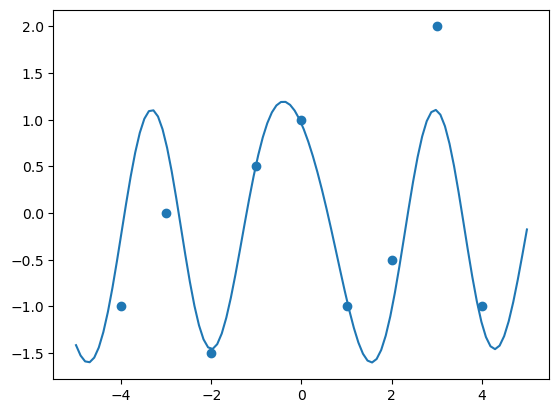

In [125]:
x = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4]).reshape((-1, 1))
y = np.array([-1, 0, -1.5, 0.5, 1, -1, -0.5, 2, -1]).reshape((-1, 1))
f = lambda inp: (inp[:, :1] ** 0, np.cos(inp) ,np.sin(inp), np.cos(2 * inp), np.sin(2 * inp), np.cos(3 * inp), np.sin(3 * inp))
x_bias = np.hstack(f(x))
w = np.linalg.lstsq(x_bias, y, rcond=None)[0]
print(w)
plt.scatter(x, y)
points=np.linspace(-5, 5, 100).reshape(-1, 1)
points_bias = np.hstack(f(points))
plt.plot(points, points_bias @ w)
plt.show()